In [ ]:
from collections import Counter
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_comments():
    driver = webdriver.Chrome()

    try:
        driver.get('http://cine21.com/movie/point/view/?movie_id=40434')

        wait = WebDriverWait(driver, 10)
        all_data = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "comment")))

        comments_text = [data.text for data in all_data]

    finally:
        driver.quit()

    return comments_text

def generate_wordcloud(words):
    wordcloud = WordCloud(font_path='malgun.ttf', background_color='white').generate_from_frequencies(words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def main():
    comments = get_comments()

    words = []

    for comment in comments:
        words.extend(comment.split())

    counter = Counter(words)

    generate_wordcloud(counter)

if __name__ == "__main__":
    main()


In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
!pip install konlpy
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 37.8 MB/s eta 0:00:00


In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

In [42]:
date='20240626'
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)
news = 'https://news.naver.com/main/ranking/popularMemo.naver'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news, headers = headers)

In [43]:
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

In [44]:
crowled_title = []
for idx, text in enumerate(news_titles):
 crowled_title.append(text.text)
 print(idx + 1, text.text)

1 손웅정 감독 아동학대 혐의 피소…“고소인, 수억원 합의금 요구”
2 신임 교총회장, 고교 제자에게 “나의 여신님”·“안아주고 싶다” 편지도
3 반포 아리팍 110억 최고가 매수자…뮤지컬 배우 홍광호였다
4 "밀양 어른들, 현금 들고 찾아와"...20년만에 '여중생 성폭행' 사과
5 ‘강제추행’ 오거돈 전 부산시장 출소…지인에 이끌려 현장 벗어나
6 “대출한도 줄어들라”… 낮아진 주담대·스트레스DSR 연기에 거래량 ‘꿈틀’
7 中, HBM 개발 美 규제에 난항… “SK하이닉스·삼성전자 공급 의존도 높아질 것”
8 합참 “北, 동해로 탄도미사일 발사했으나 실패 추정”
9 화성 화재 공장에 외국인 근로자 보낸 업체 “아리셀, 불법 파견 인정해야”
10 한몸처럼 움직이는 정부·기업… 전 세계가 보조금 전쟁
11 ‘손흥민 父’ 손웅정 감독 아동학대 혐의 피소…“고소인 주장과 달라” 반박
12 “선생님 부검해봐야” 조리돌림에…‘강남 탈출’ 애원하는 초등교사들
13 ‘박지윤과 이혼’ 최동석 “한달 카드값 4500만원 이상, 과소비야?” 질문한 까닭
14 “아이고 망측해라” 대낮 아파트 단지서 초등생들 보며 음란행위한 20대男
15 백종원 직접 등판했지만…“홍콩반점 탕수육, 젤리처럼 굳었다” 불만
16 20년 전 성폭행 사건 “우리 불찰”…‘고개 숙인’ 밀양시
17 북, 이틀 연속 ‘오물풍선’ 도발…인천공항 2시간 차질
18 20년 전 성폭행 사건 “우리 불찰”…‘고개 숙인’ 밀양시
19 남성 열 명이 ‘친구 딸’ 안고서…식당 CCTV에 담긴 장면 [잇슈 키워드]
20 합참 “북, 탄도미사일 발사했으나 실패 추정”…극초음속 가능성
21 [단독] “질 좋고 싼 한국 의료, 이번 사태로 무너질까 걱정”
22 [단독] ‘조민 입시비리 위증 혐의’ 前서울대 직원, 지금은 이성윤 보좌관
23 손웅정, 아동학대 혐의 피소…“사랑 없는 언행 없었다” 반박
24 “폐기 법안을 새걸로” “청문회 자료 좀” 국회 갑질에 갇힌 행정
25 여중생과 성관계하고 성인 연기 시켜… 실형 선고받자 

In [45]:
title = "".join(crowled_title)
filtered_title = title.replace('.', ' ').replace('"', ' ').replace(',',' ').replace("'", "").replace('·', ' ').replace('=', ' ').replace('\n', ' ')
filtered_title

'손웅정 감독 아동학대 혐의 피소…“고소인  수억원 합의금 요구”신임 교총회장  고교 제자에게 “나의 여신님” “안아주고 싶다” 편지도반포 아리팍 110억 최고가 매수자…뮤지컬 배우 홍광호였다 밀양 어른들  현금 들고 찾아와    20년만에 여중생 성폭행 사과‘강제추행’ 오거돈 전 부산시장 출소…지인에 이끌려 현장 벗어나“대출한도 줄어들라”… 낮아진 주담대 스트레스DSR 연기에 거래량 ‘꿈틀’中  HBM 개발 美 규제에 난항… “SK하이닉스 삼성전자 공급 의존도 높아질 것”합참 “北  동해로 탄도미사일 발사했으나 실패 추정”화성 화재 공장에 외국인 근로자 보낸 업체 “아리셀  불법 파견 인정해야”한몸처럼 움직이는 정부 기업… 전 세계가 보조금 전쟁‘손흥민 父’ 손웅정 감독 아동학대 혐의 피소…“고소인 주장과 달라” 반박“선생님 부검해봐야” 조리돌림에…‘강남 탈출’ 애원하는 초등교사들‘박지윤과 이혼’ 최동석 “한달 카드값 4500만원 이상  과소비야?” 질문한 까닭“아이고 망측해라” 대낮 아파트 단지서 초등생들 보며 음란행위한 20대男백종원 직접 등판했지만…“홍콩반점 탕수육  젤리처럼 굳었다” 불만20년 전 성폭행 사건 “우리 불찰”…‘고개 숙인’ 밀양시북  이틀 연속 ‘오물풍선’ 도발…인천공항 2시간 차질20년 전 성폭행 사건 “우리 불찰”…‘고개 숙인’ 밀양시남성 열 명이 ‘친구 딸’ 안고서…식당 CCTV에 담긴 장면 [잇슈 키워드]합참 “북  탄도미사일 발사했으나 실패 추정”…극초음속 가능성[단독] “질 좋고 싼 한국 의료  이번 사태로 무너질까 걱정”[단독] ‘조민 입시비리 위증 혐의’ 前서울대 직원  지금은 이성윤 보좌관손웅정  아동학대 혐의 피소…“사랑 없는 언행 없었다” 반박“폐기 법안을 새걸로” “청문회 자료 좀” 국회 갑질에 갇힌 행정여중생과 성관계하고 성인 연기 시켜… 실형 선고받자 쓰러진 명문대생‘손흥민 아버지’ 손웅정  아동학대 혐의 피소…“고소인 주장과 달라” 반박국과수  김호중 ‘면허취소’ 수치 2배 판단에도…檢 “공소장 변경 검토 안해

In [46]:
tw = Twitter() # Twitter가 Okt로 변경
tokens_ko = tw.nouns(filtered_title)
tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['손웅정',
 '감독',
 '아동학대',
 '혐의',
 '피소',
 '고소',
 '억원',
 '합의금',
 '요구',
 '신임',
 '교총',
 '회장',
 '고교',
 '제자',
 '나',
 '여신',
 '편지',
 '반포',
 '아리',
 '팍',
 '최고',
 '매수',
 '뮤지컬',
 '배우',
 '홍광호',
 '밀양',
 '어른',
 '현금',
 '여중생',
 '성폭행',
 '사과',
 '강제추행',
 '오거돈',
 '전',
 '부산시',
 '지인',
 '현장',
 '대출',
 '한도',
 '담대',
 '스트레스',
 '연기',
 '거래',
 '량',
 '꿈틀',
 '개발',
 '규제',
 '난항',
 '하이닉스',
 '삼성',
 '전자',
 '공급',
 '의존',
 '것',
 '합참',
 '동해',
 '탄도미사일',
 '발사',
 '실패',
 '추정',
 '화성',
 '화재',
 '공장',
 '외국인',
 '근로자',
 '업체',
 '아리',
 '셀',
 '불법',
 '파견',
 '인정',
 '몸',
 '정부',
 '기업',
 '전',
 '세계',
 '보조금',
 '전쟁',
 '손흥민',
 '손웅정',
 '감독',
 '아동학대',
 '혐의',
 '피소',
 '고소',
 '주장',
 '달라',
 '반박',
 '선생님',
 '부검',
 '조리돌림',
 '강남',
 '탈출',
 '애원',
 '초등',
 '교사',
 '박지윤',
 '이혼',
 '최동석',
 '달',
 '카드',
 '값',
 '이상',
 '과소',
 '비야',
 '질문',
 '까닭',
 '대낮',
 '아파트',
 '단지',
 '초등생',
 '음란',
 '행위',
 '백종원',
 '직접',
 '등판',
 '홍콩',
 '반점',
 '탕수육',
 '젤리',
 '불만',
 '전',
 '성폭행',
 '사건',
 '우리',
 '불찰',
 '고개',
 '밀양시',
 '북',
 '이틀',
 '연속',
 '물풍선',
 '도발',
 '인천공항',
 '차질',
 '전',
 '성폭행',
 '사건',
 '우리',

In [47]:
ko = nltk.Text(tokens_ko, name='기사 내 명사')
ko.tokens
ko.vocab()

FreqDist({'혐의': 29, '아동학대': 25, '피소': 23, '손웅정': 22, '한동훈': 20, '탄도미사일': 17, '발사': 17, '법': 16, '전': 13, '명': 13, ...})

In [48]:
new_ko=[]
for word in ko:
 if len(word) > 1 and word != '단독' and word != ' ':
  new_ko.append(word)
new_ko

['손웅정',
 '감독',
 '아동학대',
 '혐의',
 '피소',
 '고소',
 '억원',
 '합의금',
 '요구',
 '신임',
 '교총',
 '회장',
 '고교',
 '제자',
 '여신',
 '편지',
 '반포',
 '아리',
 '최고',
 '매수',
 '뮤지컬',
 '배우',
 '홍광호',
 '밀양',
 '어른',
 '현금',
 '여중생',
 '성폭행',
 '사과',
 '강제추행',
 '오거돈',
 '부산시',
 '지인',
 '현장',
 '대출',
 '한도',
 '담대',
 '스트레스',
 '연기',
 '거래',
 '꿈틀',
 '개발',
 '규제',
 '난항',
 '하이닉스',
 '삼성',
 '전자',
 '공급',
 '의존',
 '합참',
 '동해',
 '탄도미사일',
 '발사',
 '실패',
 '추정',
 '화성',
 '화재',
 '공장',
 '외국인',
 '근로자',
 '업체',
 '아리',
 '불법',
 '파견',
 '인정',
 '정부',
 '기업',
 '세계',
 '보조금',
 '전쟁',
 '손흥민',
 '손웅정',
 '감독',
 '아동학대',
 '혐의',
 '피소',
 '고소',
 '주장',
 '달라',
 '반박',
 '선생님',
 '부검',
 '조리돌림',
 '강남',
 '탈출',
 '애원',
 '초등',
 '교사',
 '박지윤',
 '이혼',
 '최동석',
 '카드',
 '이상',
 '과소',
 '비야',
 '질문',
 '까닭',
 '대낮',
 '아파트',
 '단지',
 '초등생',
 '음란',
 '행위',
 '백종원',
 '직접',
 '등판',
 '홍콩',
 '반점',
 '탕수육',
 '젤리',
 '불만',
 '성폭행',
 '사건',
 '우리',
 '불찰',
 '고개',
 '밀양시',
 '이틀',
 '연속',
 '물풍선',
 '도발',
 '인천공항',
 '차질',
 '성폭행',
 '사건',
 '우리',
 '불찰',
 '고개',
 '밀양시',
 '남성',
 '친구',
 '안고',
 '식당',
 '장면',
 '잇슈',
 '워드',
 '합참',

In [49]:
ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
ko.tokens
ko.vocab()

FreqDist({'혐의': 29, '아동학대': 25, '피소': 23, '손웅정': 22, '한동훈': 20, '탄도미사일': 17, '발사': 17, '국회': 13, '감독': 11, '동해': 11, ...})

In [50]:
data = ko.vocab().most_common(150)
data = dict(data)
data

{'혐의': 29,
 '아동학대': 25,
 '피소': 23,
 '손웅정': 22,
 '한동훈': 20,
 '탄도미사일': 17,
 '발사': 17,
 '국회': 13,
 '감독': 11,
 '동해': 11,
 '실패': 11,
 '화성': 11,
 '손흥민': 11,
 '무장': 11,
 '이재명': 11,
 '사과': 10,
 '합참': 10,
 '추정': 10,
 '속보': 10,
 '원희룡': 10,
 '대통령': 10,
 '고소': 9,
 '오거돈': 9,
 '부산시': 9,
 '반박': 9,
 '중국': 9,
 '논란': 9,
 '현장': 8,
 '화재': 8,
 '정부': 8,
 '주장': 8,
 '달라': 8,
 '물풍선': 8,
 '한국': 8,
 '사위': 8,
 '성폭행': 7,
 '강제추행': 7,
 '공장': 7,
 '사건': 7,
 '나경원': 7,
 '이유': 7,
 '북한': 7,
 '태극기': 7,
 '서울': 7,
 '전세': 7,
 '제주': 7,
 '요구': 6,
 '밀양': 6,
 '초음속': 6,
 '직원': 6,
 '사랑': 6,
 '청문회': 6,
 '당권': 6,
 '욕설': 6,
 '국민': 6,
 '폭주족': 6,
 '광화문': 6,
 '높이': 6,
 '윤석열': 6,
 '복귀': 6,
 '방위': 6,
 '뉴스': 6,
 '탄핵': 6,
 '최고': 5,
 '지인': 5,
 '세계': 5,
 '고개': 5,
 '밀양시': 5,
 '도발': 5,
 '인천공항': 5,
 '언행': 5,
 '경기': 5,
 '의원': 5,
 '시대': 5,
 '변화': 5,
 '의대': 5,
 '발언': 5,
 '광장': 5,
 '홍준표': 5,
 '아리': 4,
 '연기': 4,
 '이상': 4,
 '아파트': 4,
 '이틀': 4,
 '의료': 4,
 '수치': 4,
 '공부': 4,
 '주자': 4,
 '전제': 4,
 '피해자': 4,
 '참사': 4,
 '대형견': 4,
 '유튜버': 4,
 '시장': 4,
 '수도': 

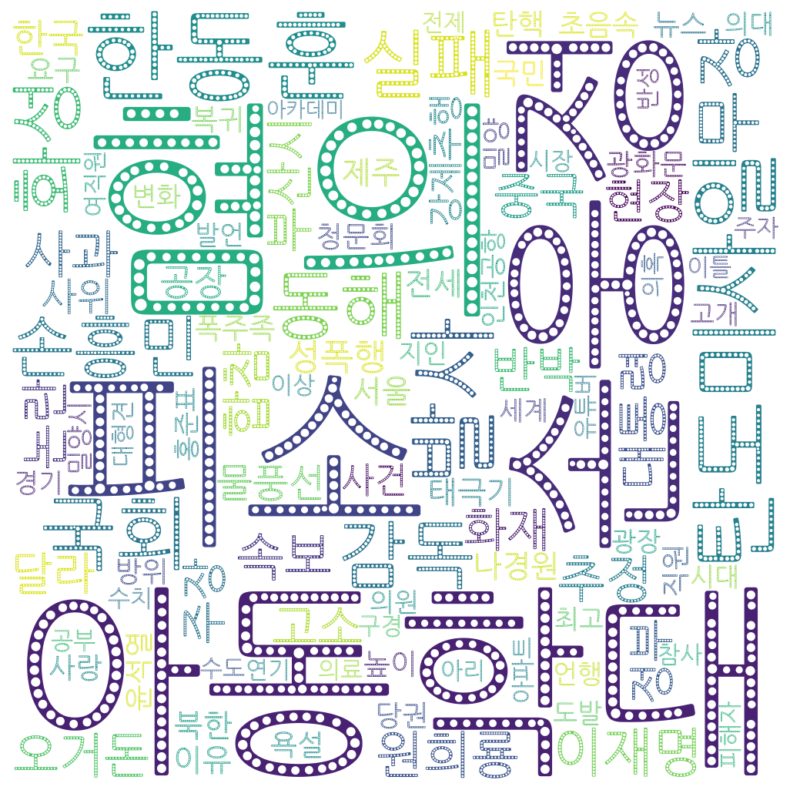

In [51]:
wordcloud = WordCloud().generate(filtered_title)
font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=font,
               background_color="white",
               width=1000,
               height=1000,
               max_words=100,
               max_font_size=300)
wc = wc.generate_from_frequencies(data)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd

In [28]:
# header 만들기
url = 'https://www.melon.com/chart/index.htm'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

In [29]:
# 헤더 확인
res =req.get(url, headers=header)
res

<Response [200]>

In [30]:
#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')
html

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

In [31]:
song=html.select('.ellipsis.rank01>span>a')
song_list=[i.text for i in song]
song_list

['Small girl (feat. 도경수(D.O.))',
 'Supernova',
 'How Sweet',
 '소나기',
 'Bubble Gum',
 'Armageddon',
 '고민중독',
 'SPOT! (feat. JENNIE)',
 '해야 (HEYA)',
 'Magnetic',
 '나는 아픈 건 딱 질색이니까',
 '한 페이지가 될 수 있게',
 '첫 만남은 계획대로 되지 않아',
 'Supernatural',
 '천상연',
 '예뻤어',
 'Boom Boom Bass',
 '미안해 미워해 사랑해',
 '에피소드',
 '사랑은 늘 도망가',
 'Welcome to the Show',
 '온기',
 'SHEESH',
 '우리들의 블루스',
 'Home',
 'Love wins all',
 '모래 알갱이',
 '비의 랩소디',
 '다시 만날 수 있을까',
 'Hype Boy',
 '이제 나만 믿어요',
 'Do or Die',
 '오래된 노래',
 'Cosmic',
 '무지개',
 'London Boy',
 'Polaroid',
 '밤양갱',
 '슬픈 초대장',
 '그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))',
 '인생찬가',
 '네가 내 마음에 자리 잡았다 (Into You)',
 'I AM',
 'Seven (feat. Latto) - Clean Ver.',
 'ETA',
 'To. X',
 'Drama',
 'Super Shy',
 '연애편지',
 '그랬나봐',
 '헤어지자 말해요',
 'MAESTRO',
 '청혼하지 않을 이유를 못 찾았어',
 'Right Now',
 'WAY 4 LUV',
 'Accendio',
 'Love 119',
 '내가 S면 넌 나의 N이 되어줘',
 'Run Run',
 'Attention',
 '봄눈',
 'Ditto',
 'Get A Guitar',
 '보금자리',
 '너의 모든 순간',
 '사랑인가 봐',
 'Girls Never Die',
 'Spicy',
 'Impossible'

In [32]:
singer=html.select('.ellipsis.rank02>a')
singer

[<a href="javascript:melon.link.goArtistDetail('2636153');" title="이영지 - 페이지 이동">이영지</a>,
 <a href="javascript:melon.link.goArtistDetail('2899555');" title="aespa - 페이지 이동">aespa</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('3752136');" title="이클립스 (ECLIPSE) - 페이지 이동">이클립스 (ECLIPSE)</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('2899555');" title="aespa - 페이지 이동">aespa</a>,
 <a href="javascript:melon.link.goArtistDetail('3610529');" title="QWER - 페이지 이동">QWER</a>,
 <a href="javascript:melon.link.goArtistDetail('602056');" title="지코 (ZICO) - 페이지 이동">지코 (ZICO)</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goArtistDetail('3743525');" title="아일릿(ILLIT) - 페이지 이동">아일릿(ILLIT)</a>,
 <a href="j

In [33]:
singer_list=[i.text for i in singer]
singer_list


['이영지',
 'aespa',
 'NewJeans',
 '이클립스 (ECLIPSE)',
 'NewJeans',
 'aespa',
 'QWER',
 '지코 (ZICO)',
 'IVE (아이브)',
 '아일릿(ILLIT)',
 '(여자)아이들',
 'DAY6 (데이식스)',
 'TWS (투어스)',
 'NewJeans',
 '이창섭',
 'DAY6 (데이식스)',
 'RIIZE',
 'Crush',
 '이무진',
 '임영웅',
 'DAY6 (데이식스)',
 '임영웅',
 'BABYMONSTER',
 '임영웅',
 '임영웅',
 '아이유',
 '임영웅',
 '임재현',
 '임영웅',
 'NewJeans',
 '임영웅',
 '임영웅',
 '허각',
 '임한별',
 '이무진',
 '이진성 (먼데이 키즈)',
 '김희재',
 '#안녕',
 'Red Velvet (레드벨벳)',
 '임영웅',
 '임영웅',
 '임영웅',
 '비비 (BIBI)',
 '순순희 (지환)',
 '너드커넥션 (Nerd Connection)',
 '임영웅',
 '엔플라잉 (N.Flying)',
 'IVE (아이브)',
 '정국',
 'NewJeans',
 '태연 (TAEYEON)',
 'aespa',
 'NewJeans',
 '임영웅',
 '유회승 (엔플라잉)',
 '박재정',
 '세븐틴 (SEVENTEEN)',
 '이무진',
 'NewJeans',
 'PLAVE',
 'IVE (아이브)',
 'RIIZE',
 'TWS (투어스)',
 '이클립스 (ECLIPSE)',
 'NewJeans',
 '10CM',
 'NewJeans',
 'RIIZE',
 '임영웅',
 '성시경',
 '멜로망스',
 'tripleS (트리플에스)',
 'aespa',
 'RIIZE',
 '하동균',
 '범진',
 'RIIZE',
 '부석순 (SEVENTEEN)',
 'KISS OF LIFE',
 'NewJeans',
 '아일릿(ILLIT)',
 'PLAVE',
 'VIVIZ (비비지)',
 'LE SSERAFIM (르세라핌

In [34]:
# 랭킹 리스트 생성, 각 리스트 길이 확인
rank_list =[i+1 for i in range(len(song_list))]
print(len(rank_list))
print(len(singer_list))
print(len(song_list))

100
106
100


In [37]:
#딕셔너리 형태로 생성하고 데이터 프레임 생성
top_100={'순위':rank_list, '가수':singer_list[:100], '곡명':song_list}
top_100_df = pd.DataFrame(top_100)
top_100_df

,순위,가수,곡명
0,1,이영지,Small girl (feat. 도경수(D.O.))
1,2,aespa,Supernova
2,3,NewJeans,How Sweet
3,4,이클립스 (ECLIPSE),소나기
4,5,NewJeans,Bubble Gum
...,...,...,...
95,96,AKMU (악뮤),"모든 날, 모든 순간 (Every day, Every Moment)"
96,97,세븐틴 (SEVENTEEN),다정히 내 이름을 부르면
97,98,방탄소년단,손오공
98,99,태연 (TAEYEON),취중고백
